# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [1]:
from scipy.stats import norm
from numpy import sqrt
Z = round(norm.interval(0.95)[1],2)
var = 225
std = sqrt(var)
sem = 3

n = round((Z * std / sem) ** 2)
n

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [2]:
import numpy as np
from scipy import stats

conf_interval = 0.98
n = 25
X = 130
std = 15

sem = std / np.sqrt(n)
less, greater =  stats.t.interval(conf_interval, df=n-1)
interval = X + sem * less, X + sem * greater

In [3]:
L = round(interval[1] - interval[0])
L

15

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [4]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

men  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия
# scale -> std - стандартное отклонение !


alpha = 0.001
# H0 -> среднее выборки не отличаются X_men = X_women
# H1 -> среднее выборки отличаются X_men != X_women

t_statistic, pvalue = stats.ttest_ind(men, women)

pvalue = round(pvalue, 5)

if pvalue > alpha:
    print(f'Статистически значимых различий между двумя выборками не обнаружено\npvalue = {pvalue}\nalpha = {alpha}')
    print(f'{pvalue} > {alpha}')
else:
    print(f'Существует статистически значимые различия\npvalue = {pvalue}\nalpha = {alpha}')
    print(f'{pvalue} < {alpha}')

Существует статистически значимые различия
pvalue = 0.00025
alpha = 0.001
0.00025 < 0.001


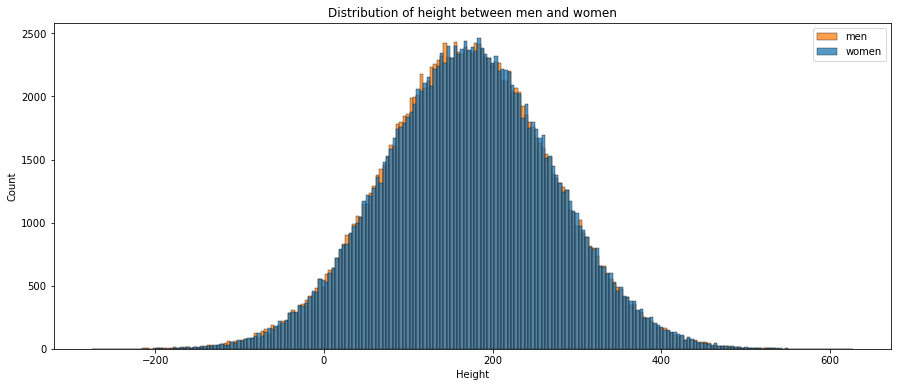

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
sns.histplot([men,women])
plt.title('Distribution of height between men and women')
plt.xlabel('Height')
plt.legend(['men', 'women'])
plt.show()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [6]:
### Ваш код...
std = 150
sem = 50
Z = round(norm.interval(0.95)[1],2)
n = round((Z * std / sem) ** 2)
n

35

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

> **За нулевую гипотезу здесь принимаем, что наш маг не умеет предсказывать погоду, а то что ответы распределены равновероятно и их количество равно между собой.**

- **H0 -> true_predict = false_predict**

- **H1 -> true_predict != false_predict**

In [7]:
import pandas as pd
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [8]:
# Точный тест Фишера
oddsratio, pvalue = stats.fisher_exact(observations)
pvalue

0.35417955365927367

In [9]:
"""
Returns
-------
chi2 : float
    The test statistic.
p : float
    The p-value of the test
dof : int
    Degrees of freedom
expected : ndarray, same shape as `observed`
    The expected frequencies, based on the marginal sums of the table.
"""
# Хи^2 / Критерий Пирсона
chi2, pvalue, dof, expected = stats.chi2_contingency(observations)
pvalue

0.35396880166541644

> **Мы не можем опровергнуть нулевую гипотезу о том, что предсказание ни есть чистая случайность. Т.к p-value превышает уроветь значимости в 0.05**

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

Использую свой вариант без использования готовой функции. При желании можно обернуть в функцию.

In [10]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

less, greater = stats.t.interval(0.9, len(data) - 1)
sem = stats.sem(data)
mean = np.mean(data)
lower_b, upper_b  = (sem * less) + mean, (sem * greater) + mean
lower_b, mean, upper_b

(6.073631100387619, 6.628571428571429, 7.183511753944288)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [11]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [12]:
#Ваш код:
aplha = 0.05
t_statistic, pvalue = stats.ttest_ind(A,B)
if pvalue > alpha:
    print(f'Статистически значимых различий между двумя выборками не обнаружено\npvalue = {pvalue}')
else:
    print(f'Существует статистически значимые различия. Выборки вероятно не принадлежат одной совокупности\npvalue = {pvalue}')

Существует статистически значимые различия. Выборки вероятно не принадлежат одной совокупности
pvalue = 4.623319592204015e-25


<AxesSubplot:ylabel='Count'>

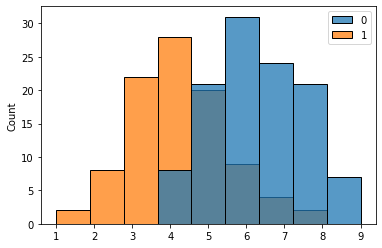

In [13]:
sns.histplot([A, B])

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал ~~уровень значимости~~  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

<!-- ### Ваши выводы:  -->
> **Все будет зависеть от выбраного нами уровня значимости. При уровне значимости = 0.05 мы вынуждены откланить нулевую гипотезу и принять альтернативную, что переменная имеет не нормальное распределение**

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

In [15]:
alpha = 0.05
t_stat, pvalue = stats.ttest_ind(A, B)
if alpha < pvalue:
    print(f'Статистичесик значимых различий между выборками нет при уровне значимости {alpha}', f'pvalue = {pvalue}', sep='\n')
else:
    print(f'Сужествуют статистически значимые различия между выборками A и B при уровне значимости {alpha}', f'pvalue = {pvalue}', sep='\n')

Статистичесик значимых различий между выборками нет при уровне значимости 0.05
pvalue = 0.051284593140469285


> **При pvalue < 0.05 различия бы уже считались статистически значимы**

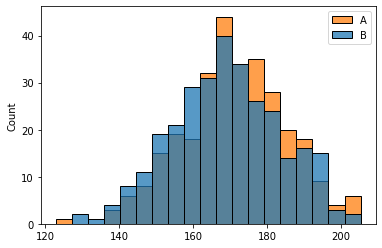

In [16]:
sns.histplot([A, B])
plt.legend(['A', 'B'])